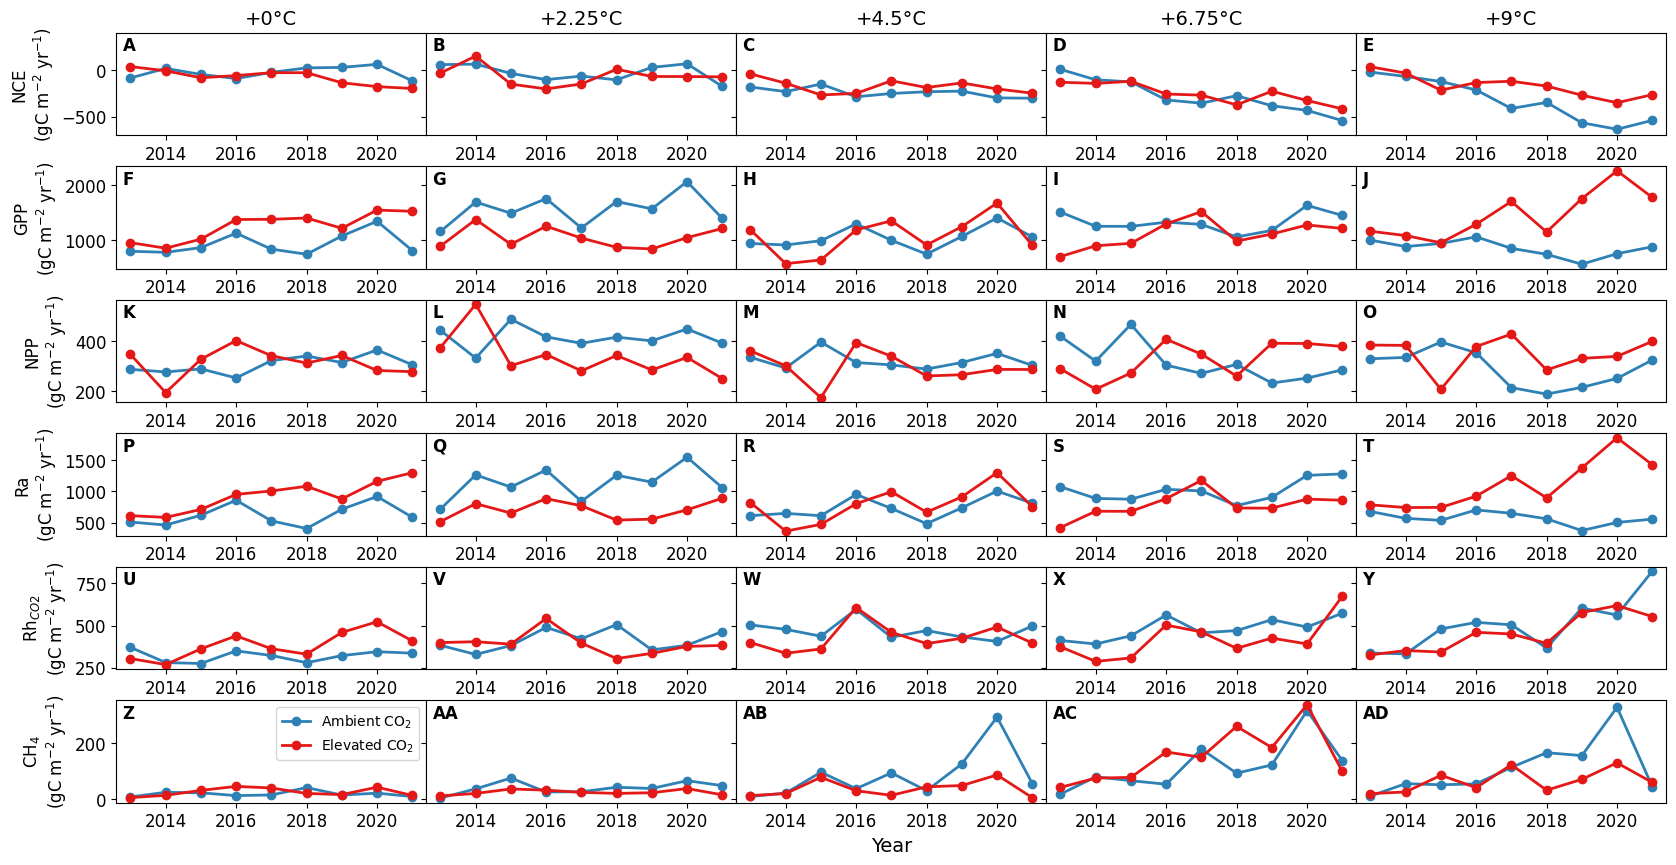

In [2]:
# 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

def get_subplot_label(n):
    alphabet = string.ascii_lowercase
    label = ''
    while True:
        n, r = divmod(n, 26)
        label = alphabet[r] + label
        if n == 0:
            break
        n -= 1  # Excel-like offset
    return f"{label}"

df_data = pd.read_excel("1_data_source.xlsx")
df_data = df_data[df_data["year"]>2012]

ls_vars = ["nce", "gpp", "npp", "ra", "rh", "ch4", 
        #    "gpp_Shrub", "gpp_Sphagnum", "gpp_Tree",
        #    "npp_Shrub", "npp_Sphagnum", "npp_Tree",
        #    "ra_Shrub", "ra_Sphagnum", "ra_Tree",
           ]
dict_ylabels = {
    "nce": "NCE\n(gC m$^{-2}$ yr$^{-1}$)", "gpp": "GPP\n(gC m$^{-2}$ yr$^{-1}$)", 
    "npp": "NPP\n(gC m$^{-2}$ yr$^{-1}$)", "ra" : "Ra\n(gC m$^{-2}$ yr$^{-1}$)", 
    "rh" : "Rh$_{CO2}$\n(gC m$^{-2}$ yr$^{-1}$)", "ch4": "CH$_4$\n(gC m$^{-2}$ yr$^{-1}$)",
}
ls_warmings = [0, 2.25, 4.5, 6.75, 9]
warming_titles = ["+0°C", "+2.25°C", "+4.5°C", "+6.75°C", "+9°C"]

ls_colors = ["#2F81B5","#E51818"]
ls_label_co2 = ["Ambient CO$_2$", "Elevated CO$_2$"]

ls_plots = [("P06", "P19"), ("P20", "P11"), ("P13", "P04"), ("P08", "P16"), ("P17", "P10")]

fig, axes = plt.subplots(len(ls_vars),5,figsize=(20,10),sharey="row")

idx_num = 0
for idx_var, ivar in enumerate(ls_vars):
    axes[idx_var, 0].set_ylabel(dict_ylabels[ivar], fontsize=12)
    for idx_warming, plots in enumerate(ls_plots):
        axes[0, idx_warming].set_title(warming_titles[idx_warming], fontsize=14)
        ax = axes[idx_var, idx_warming]
        label = get_subplot_label(idx_num)
        idx_num +=1
        ax.text(0.02,0.96,label.upper(), ha="left", va="top", transform=ax.transAxes, fontsize=12, fontweight="bold")
        for idx_co2, iplot in enumerate(plots):
            df_plot = df_data[df_data["plot"]==iplot].copy()
            x = df_plot["year"].values
            y = df_plot[ivar]
            ax.plot(x, y, color=ls_colors[idx_co2], marker='o', markersize=6, linewidth=2,
                    label="Ambient CO$_2$" if idx_co2 == 0 else "Elevated CO$_2$")
        
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

axes[0,0].set_ylim(-699,399)
axes[len(ls_vars)-1,2].set_xlabel("Year", fontsize=14)
axes[-1,0].legend()
plt.subplots_adjust(wspace=0, hspace=0.3)